# Youtube - Trending Video Analytics Reviewer
## Data Analytics with Python Course - Final Assessment
## Analyzing, Part 2 of 2
submitted by: Ramon (Monch) Mercader

Please use README.md and Project_Backgroun.md files for more information on how to use this file.<br>

In [1]:
#Imported libraries
import os
import glob
import requests
import numpy as np
import pandas as pd
import datetime
from collections import Counter
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
fig_size = (10, 8)
print("all items imported") #Using this as a status to indicate that all the imports are completed

all items imported


## Loading all Final Total CSV files

In [2]:
#Housekeeping, check your current working directory and make sure you are inside Final_Assessment (or the main directory with datasets folder)
#You will need to use the output of this cell as your path in the next cell
#The folder should have the files and the datasets folder inside the current working directory
os.getcwd()

'C:\\Users\\monch.mercader\\Python\\Data_Analytics\\Module 1\\Final_Assessment'

In [3]:
#Load all previously saved CSV files from datasets\Final_CSV folder
#Each file will be loaded into their respective Country dataframes
#This uses an absolute path and os.path.join to make it OS independent

#For Macs path, replace the path below to your own:
#path = r'//Users/monchmercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets'
#AU_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_AU.csv'))
#US_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_US.csv'))
#NZ_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_NZ.csv'))
#GB_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_GB.csv'))
#PH_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_PH.csv'))
#SG_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_SG.csv'))


#For Windows path, replace the path below to your own:
AU_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_AU.csv'))
US_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_US.csv'))
NZ_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_NZ.csv'))
GB_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_GB.csv'))
PH_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_PH.csv'))
SG_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_SG.csv'))
print("All Final CSV files have been loaded")

All Final CSV files have been loaded


In [4]:
#Quick check if the data loaded is correct, just replace the first two country code letters with whichever data you want to check

US_Analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         55 non-null     int64 
 1   video_id           55 non-null     object
 2   title              55 non-null     object
 3   publishedAt        55 non-null     object
 4   channelId          55 non-null     object
 5   channelTitle       55 non-null     object
 6   categoryId         55 non-null     int64 
 7   trending_date      55 non-null     object
 8   tags               55 non-null     object
 9   view_count         55 non-null     int64 
 10  likes              55 non-null     int64 
 11  dislikes           55 non-null     int64 
 12  comment_count      55 non-null     int64 
 13  thumbnail_link     55 non-null     object
 14  comments_disabled  55 non-null     bool  
 15  ratings_disabled   55 non-null     bool  
 16  description        54 non-null     object
dtyp

## 5 & 6. Analysis & Data Visualization:<br>
To complement the Data Analysis I have consolidated them with the Data Visualizations: <br>
I've included the Observations after each data visualization section. <br>

### 1. What are the top trending categories per country?<br>
Note that this is based on the timeframe of the data gathered

In [5]:
#This picks the unique categories, and the category counts, then passes them to variables
#This is important to plot out the charts

US_x_edited_bar = US_Analysis_df['categoryId'].value_counts().tolist()
US_y_bar = US_Analysis_df['categoryId'].unique()

AU_x_edited_bar = AU_Analysis_df['categoryId'].value_counts().tolist()
AU_y_bar = AU_Analysis_df['categoryId'].unique()

GB_x_edited_bar = GB_Analysis_df['categoryId'].value_counts().tolist()
GB_y_bar = GB_Analysis_df['categoryId'].unique()

NZ_x_edited_bar = NZ_Analysis_df['categoryId'].value_counts().tolist()
NZ_y_bar = NZ_Analysis_df['categoryId'].unique()

PH_x_edited_bar = PH_Analysis_df['categoryId'].value_counts().tolist()
PH_y_bar = PH_Analysis_df['categoryId'].unique()

SG_x_edited_bar = SG_Analysis_df['categoryId'].value_counts().tolist()
SG_y_bar = SG_Analysis_df['categoryId'].unique()
print("Task completed")

Task completed


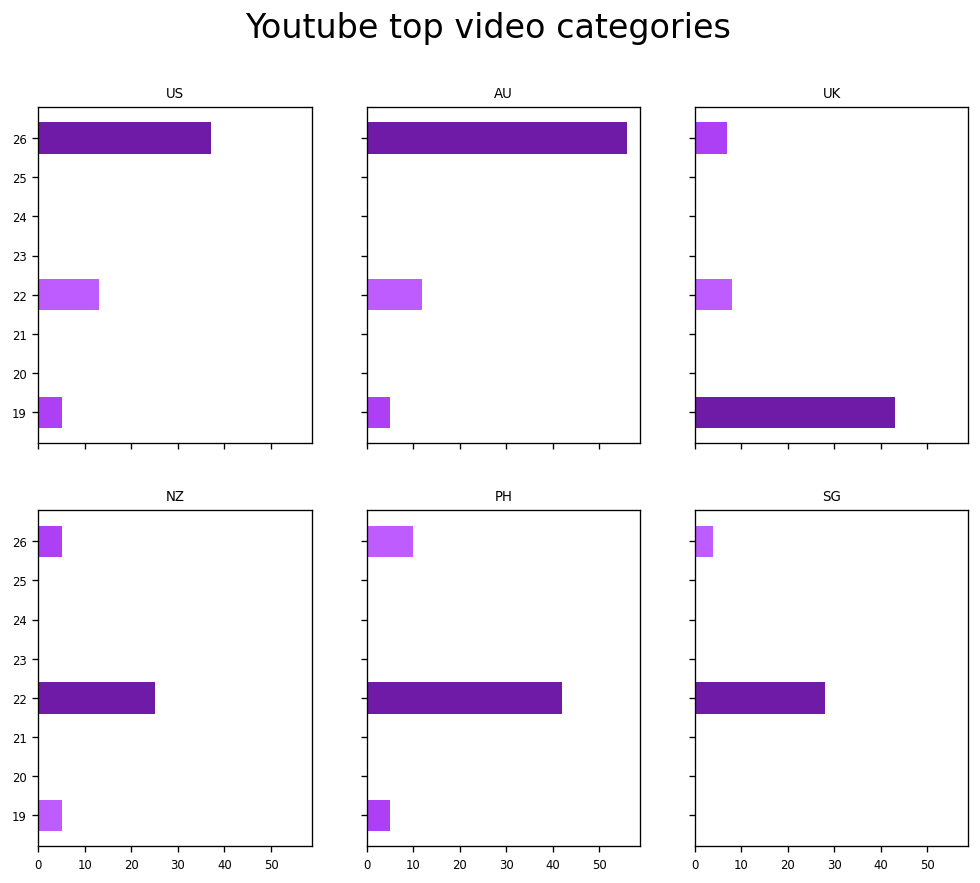

In [6]:
#Plotting the Horizontal bar graphs for top video categories per country
plt.rcdefaults()
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=fig_size, dpi=120)

fig.suptitle("Youtube top video categories", fontsize=20)

ax[0, 0].barh(US_y_bar, US_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[0, 0].tick_params(labelsize=7)
ax[0, 0].set_title("US", fontsize=8)

ax[0, 1].barh(AU_y_bar, AU_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[0, 1].tick_params(labelsize=7)
ax[0, 1].set_title("AU", fontsize=8)

ax[0, 2].barh(GB_y_bar, GB_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[0, 2].tick_params(labelsize=7)
ax[0, 2].set_title("UK", fontsize=8)

ax[1, 0].barh(NZ_y_bar, NZ_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[1, 0].tick_params(labelsize=7)
ax[1, 0].set_title("NZ", fontsize=8)

ax[1, 1].barh(PH_y_bar, PH_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[1, 1].tick_params(labelsize=7)
ax[1, 1].set_title("PH", fontsize=8)

ax[1, 2].barh(SG_y_bar, SG_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[1, 2].tick_params(labelsize=7)
ax[1, 2].set_title("SG", fontsize=8)

plt.show()

### Relevant Youtube category index:
Below are the reference for what each value on the Y axis means.
- 37 = Family<br>
- 26 = How To & Style<br>
- 22 = People & Blogs<br>
- 21 = Video blogging<br>
- 19 = Travel & Events<br>

## Analysis:
- We can see some similarities between the US and Australia with their How To & Style being the most popular category, while in the Philippines, New Zealand, and Singapore, People & Blogs are trending. 
- UK seems to be more into Travel & Events, a possible theory here is that because of their current lockdown conditions maybe pushing more to view traveling videos.

In [7]:
#Creating the value for plotting on the views vs likes vs dislikes graphs
AU_index = AU_Analysis_df.index
AU_views = AU_Analysis_df['view_count']
AU_likes = AU_Analysis_df['likes']
AU_dislikes = AU_Analysis_df['dislikes']

PH_index = PH_Analysis_df.index
PH_views = PH_Analysis_df['view_count']
PH_likes = PH_Analysis_df['likes']
PH_dislikes = PH_Analysis_df['dislikes']

SG_index = SG_Analysis_df.index
SG_views = SG_Analysis_df['view_count']
SG_likes = SG_Analysis_df['likes']
SG_dislikes = SG_Analysis_df['dislikes']

NZ_index = NZ_Analysis_df.index
NZ_views = NZ_Analysis_df['view_count']
NZ_likes = NZ_Analysis_df['likes']
NZ_dislikes = NZ_Analysis_df['dislikes']

GB_index = GB_Analysis_df.index
GB_views = GB_Analysis_df['view_count']
GB_likes = GB_Analysis_df['likes']
GB_dislikes = GB_Analysis_df['dislikes']

US_index = US_Analysis_df.index
US_views = US_Analysis_df['view_count']
US_likes = US_Analysis_df['likes']
US_dislikes = US_Analysis_df['dislikes']

 ## 2. How many views does it take to become a trending video?<br>
 We also try to see if there are any relationships between a video's viewership/trending and the amount of likes and dislikes they receive. 

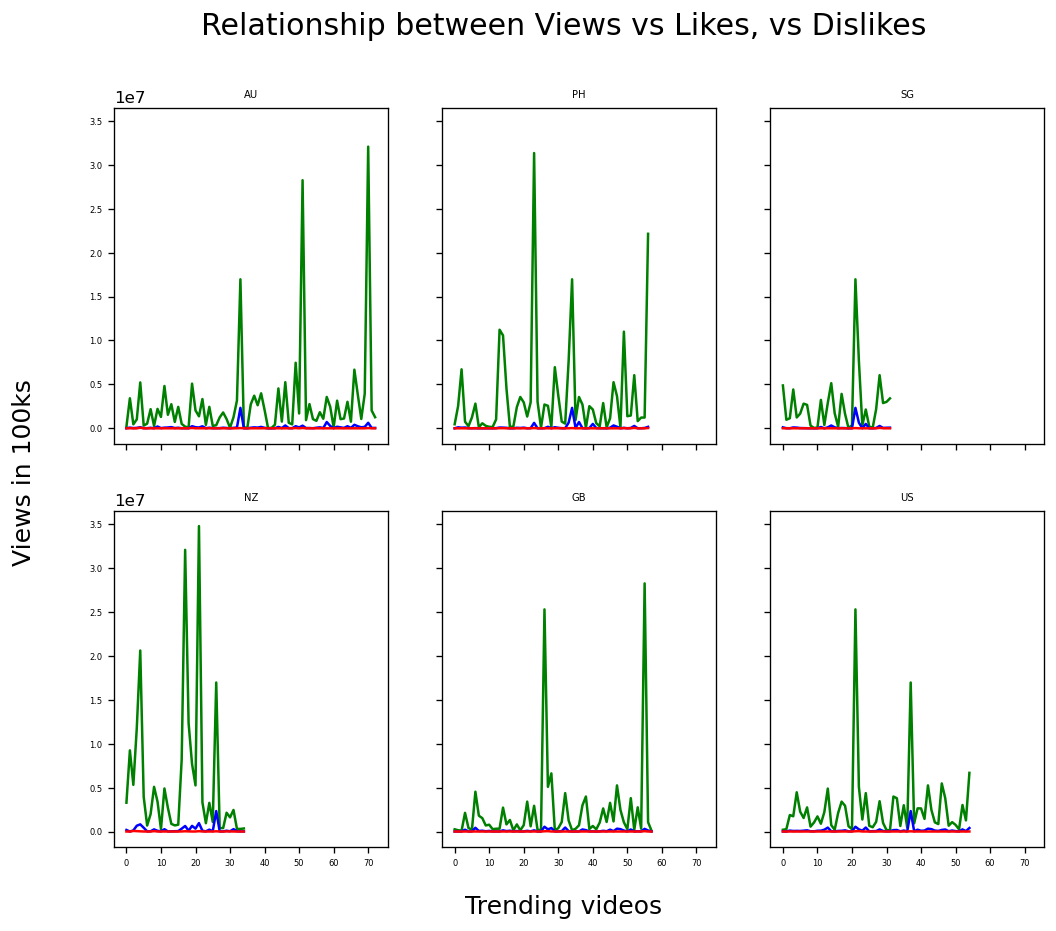

In [8]:
#Plotting the viewcount vs Likes vs dislikes relationship graph
plt.rcdefaults()
view_fig, v_axs = plt.subplots(nrows = 2, ncols = 3, sharey=True, sharex=True, figsize=fig_size, dpi=120)

view_fig.suptitle("Relationship between Views vs Likes, vs Dislikes", fontsize=18)
view_fig.text(0.5, 0.04, 'Trending videos', ha='center', fontsize=15)
view_fig.text(0.04, 0.5, 'Views in 100ks', va='center', rotation='vertical', fontsize=15)


#AUS
v_axs[0,0].plot(AU_index, AU_views, color='green')
v_axs[0,0].plot(AU_index, AU_likes, color='blue')
v_axs[0,0].plot(AU_index, AU_dislikes, color='red')
v_axs[0, 0].tick_params(labelsize=5)
v_axs[0,0].set_title("AU", fontsize=6)
#PH
v_axs[0,1].plot(PH_index, PH_views, color='green')
v_axs[0,1].plot(PH_index, PH_likes, color='blue')
v_axs[0,1].plot(PH_index, PH_dislikes, color='red')
v_axs[0,1].set_title("PH", fontsize=6)
#SG
v_axs[0,2].plot(SG_index, SG_views, color='green')
v_axs[0,2].plot(SG_index, SG_likes, color='blue')
v_axs[0,2].plot(SG_index, SG_dislikes, color='red')
v_axs[0,2].set_title("SG", fontsize=6)
#NZ
v_axs[1,0].plot(NZ_index, NZ_views, color='green')
v_axs[1,0].plot(NZ_index, NZ_likes, color='blue')
v_axs[1,0].plot(NZ_index, NZ_dislikes, color='red')
v_axs[1,0].tick_params(labelsize=5)
v_axs[1,0].set_title("NZ", fontsize=6)
#GB
v_axs[1,1].plot(GB_index, GB_views, color='green')
v_axs[1,1].plot(GB_index, GB_likes, color='blue')
v_axs[1,1].plot(GB_index, GB_dislikes, color='red')
v_axs[1,1].tick_params(labelsize=5)
v_axs[1,1].set_title("GB", fontsize=6)
#US
v_axs[1,2].plot(US_index, US_views, color='green')
v_axs[1,2].plot(US_index, US_likes, color='blue')
v_axs[1,2].plot(US_index, US_dislikes, color='red')
v_axs[1,2].tick_params(labelsize=5)
v_axs[1,2].set_title("US", fontsize=6)

plt.show()

LEGEND:
    - Green - views
    - Blue - likes
    - Red - dislikes

## Analysis
- We can see that on average, videos with over 250k views get into the trending category. 
- And that likes have a certain percentage, estimating ~5-10% of the total views.
- Also noting that dislikes are very low to almost non existent on these videos. But further study is needed to review videos with high dislikes proportion to view count to make any assumptions. 

## 3. How long does it usually take for a video to trend?<br>
I try to see how long before a video is trending from publish date(not uploaded, but publish) to being marked as trending. From research, Youtube defines trending as continous views past 1000 over a certain time. 

In [9]:
#First we need to make sure that all the dates required are standardized to a datetime format. 
#I will test it out wiht one dataset and then apply to all others. 
#Standardizing the dates, removing last 10 characters of string from publishAt column. Run only once, otherwise, you will need to reload the csv into the dataframe.
US_Analysis_df['publishedAt'] = US_Analysis_df['publishedAt'].str[:-10]

In [10]:
#Convert trending date to same format as publishedAt
US_Analysis_df['publishedAt'] = pd.to_datetime(US_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')

In [11]:
#Checking that the dates have been standardized for the 2 columns publishedAt and trending_date
US_Analysis_df.head(50)

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,165,S6aXAwYT6nY,MY LAST PREGNANCY UPDATE ON THE TWINS | OUR UL...,21.04.01,UC_0mlge_fLewbr5P8YEL2tA,THE WEISS LIFE,26,21.11.01,pregnancy update on the twins!|unexpected news...,199889,9208,309,0,https://i.ytimg.com/vi/S6aXAwYT6nY/default.jpg,True,False,Don't forget to subscribe! http://www.youtube....
1,181,5PtKZ5cx3v8,Addressing Rumors & Upstairs House Tour! | Car...,21.03.01,UCiRBm8w6yfSJdly2wwfe0rw,Carly Waddell,22,21.11.01,[none],266128,3308,215,0,https://i.ytimg.com/vi/5PtKZ5cx3v8/default.jpg,True,False,Hi everyone... I hope you enjoyed today's vide...
2,185,2YbKnj7OmVQ,IM PREGNANT!,21.01.01,UCAXEGk-l_ioBMvHa9_uHJjg,A&B Things,22,21.11.01,baby|surprise|pregnant|boyfriend|girlfriend|Yo...,1878140,104365,2291,13004,https://i.ytimg.com/vi/2YbKnj7OmVQ/default.jpg,False,False,We are both totally speechless... God blessed ...
3,186,CPI_Ve7vsHs,NEW Full Body HIIT Workout to lose Weight | 20...,21.02.01,UCCgLoMYIyP0U56dEhEL1wXQ,Chloe Ting,26,21.11.01,flat stomach|flat stomach workout|flat stomach...,1738819,61452,463,3872,https://i.ytimg.com/vi/CPI_Ve7vsHs/default.jpg,False,False,Start your 2021 new years resolution with a ne...
4,191,aE_zvyuAcuo,If Everything Was Like Among Us *Bloopers 2*,21.01.01,UCn3AViOfcFN4zIICMC5hvPg,Shiloh & Bros,22,21.11.01,among us|among us in real life|among us impost...,4468403,74402,2226,7865,https://i.ytimg.com/vi/aE_zvyuAcuo/default.jpg,False,False,Among us in real life bloopers! These are bloo...
5,192,ZSIp00SewO8,Day 1 - Invite | BREATH - A 30 Day Yoga Journey,21.02.01,UCFKE7WVJfvaHW5q283SxchA,Yoga With Adriene,26,21.11.01,breath|30 day yoga journey|30 days of yoga|yog...,2261699,63058,889,8962,https://i.ytimg.com/vi/ZSIp00SewO8/default.jpg,False,False,"Your first yoga practice is here, and it is a ..."
6,390,SAjP9HCqk4I,Deadpool 2 Monologue,21.04.01,UCA3-nIYWu4PTWkb6NwhEpzg,Ryan Reynolds,22,21.13.01,[none],1540252,95454,770,3100,https://i.ytimg.com/vi/SAjP9HCqk4I/default.jpg,False,False,Introducing Walker Scobell. This innocent youn...
7,553,JMgHZ5XHA_4,"He Bet $20,000 On A Coinflip, And Won",21.07.01,UC4-79UOlP48-QNGgCko5p2g,MrBeast Shorts,22,21.14.01,[none],2743697,137413,1491,6897,https://i.ytimg.com/vi/JMgHZ5XHA_4/default.jpg,False,False,Subscribe if you want to do this #shorts this ...
8,555,ab4DHOFbnK0,10 DOLLAR TREE SECRETS to organize your home l...,21.06.01,UCJA8OyDxRY-wm0ya2gtHOsw,Do It On A Dime,26,21.14.01,doitonadime|home organization|home organizing|...,558079,32634,452,1365,https://i.ytimg.com/vi/ab4DHOFbnK0/default.jpg,False,False,The first 1000 people to use my link will get ...
9,564,Wexk0hA05es,Delicious carne asada quesadilla,21.04.01,UCG0aOR5kjOv82FJ3zyqtC2Q,Miguel’s Cookingwithfire,22,21.14.01,[none],1021564,23142,681,801,https://i.ytimg.com/vi/Wexk0hA05es/default.jpg,False,False,Made some delicious I guess quesadillas thing ...


In [12]:
#converting string dates to date objects
US_Analysis_df['publishedAt'] = pd.to_datetime(US_Analysis_df['publishedAt'], format='%y.%d.%m')
US_Analysis_df['trending_date'] = pd.to_datetime(US_Analysis_df['trending_date'], format='%y.%d.%m')

In [13]:
#Subtracting trend date from publish date to see how long it took to trend
US_timetotrend = (US_Analysis_df['trending_date'] - US_Analysis_df['publishedAt']).dt.days

In [14]:
#Checking if it worked
US_timetotrend.head(5)

0     7
1     8
2    10
3     9
4    10
dtype: int64

In [15]:
#Once it works, we can apply it to all the other datasets
#Standardizing the dates, removing last 10 characters of string from publishAt column. Run only once, otherwise, you will need to reload the csv into the dataframe.
PH_Analysis_df['publishedAt'] = PH_Analysis_df['publishedAt'].str[:-10]
AU_Analysis_df['publishedAt'] = AU_Analysis_df['publishedAt'].str[:-10]
GB_Analysis_df['publishedAt'] = GB_Analysis_df['publishedAt'].str[:-10]
SG_Analysis_df['publishedAt'] = SG_Analysis_df['publishedAt'].str[:-10]
NZ_Analysis_df['publishedAt'] = NZ_Analysis_df['publishedAt'].str[:-10]

#Convert trending date to same format as publishedAt
PH_Analysis_df['publishedAt'] = pd.to_datetime(PH_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
PH_Analysis_df['publishedAt'] = pd.to_datetime(PH_Analysis_df['publishedAt'], format='%y.%d.%m')
PH_Analysis_df['trending_date'] = pd.to_datetime(PH_Analysis_df['trending_date'], format='%y.%d.%m')
PH_timetotrend = (PH_Analysis_df['trending_date'] - PH_Analysis_df['publishedAt']).dt.days

AU_Analysis_df['publishedAt'] = pd.to_datetime(AU_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
AU_Analysis_df['publishedAt'] = pd.to_datetime(AU_Analysis_df['publishedAt'], format='%y.%d.%m')
AU_Analysis_df['trending_date'] = pd.to_datetime(AU_Analysis_df['trending_date'], format='%y.%d.%m')
AU_timetotrend = (AU_Analysis_df['trending_date'] - AU_Analysis_df['publishedAt']).dt.days

GB_Analysis_df['publishedAt'] = pd.to_datetime(GB_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
GB_Analysis_df['publishedAt'] = pd.to_datetime(GB_Analysis_df['publishedAt'], format='%y.%d.%m')
GB_Analysis_df['trending_date'] = pd.to_datetime(GB_Analysis_df['trending_date'], format='%y.%d.%m')
GB_timetotrend = (GB_Analysis_df['trending_date'] - GB_Analysis_df['publishedAt']).dt.days

SG_Analysis_df['publishedAt'] = pd.to_datetime(SG_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
SG_Analysis_df['publishedAt'] = pd.to_datetime(SG_Analysis_df['publishedAt'], format='%y.%d.%m')
SG_Analysis_df['trending_date'] = pd.to_datetime(SG_Analysis_df['trending_date'], format='%y.%d.%m')
SG_timetotrend = (SG_Analysis_df['trending_date'] - SG_Analysis_df['publishedAt']).dt.days

NZ_Analysis_df['publishedAt'] = pd.to_datetime(NZ_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
NZ_Analysis_df['publishedAt'] = pd.to_datetime(NZ_Analysis_df['publishedAt'], format='%y.%d.%m')
NZ_Analysis_df['trending_date'] = pd.to_datetime(NZ_Analysis_df['trending_date'], format='%y.%d.%m')
NZ_timetotrend = (NZ_Analysis_df['trending_date'] - NZ_Analysis_df['publishedAt']).dt.days
print("Date conversion and subtraction completed")

Date conversion and subtraction completed


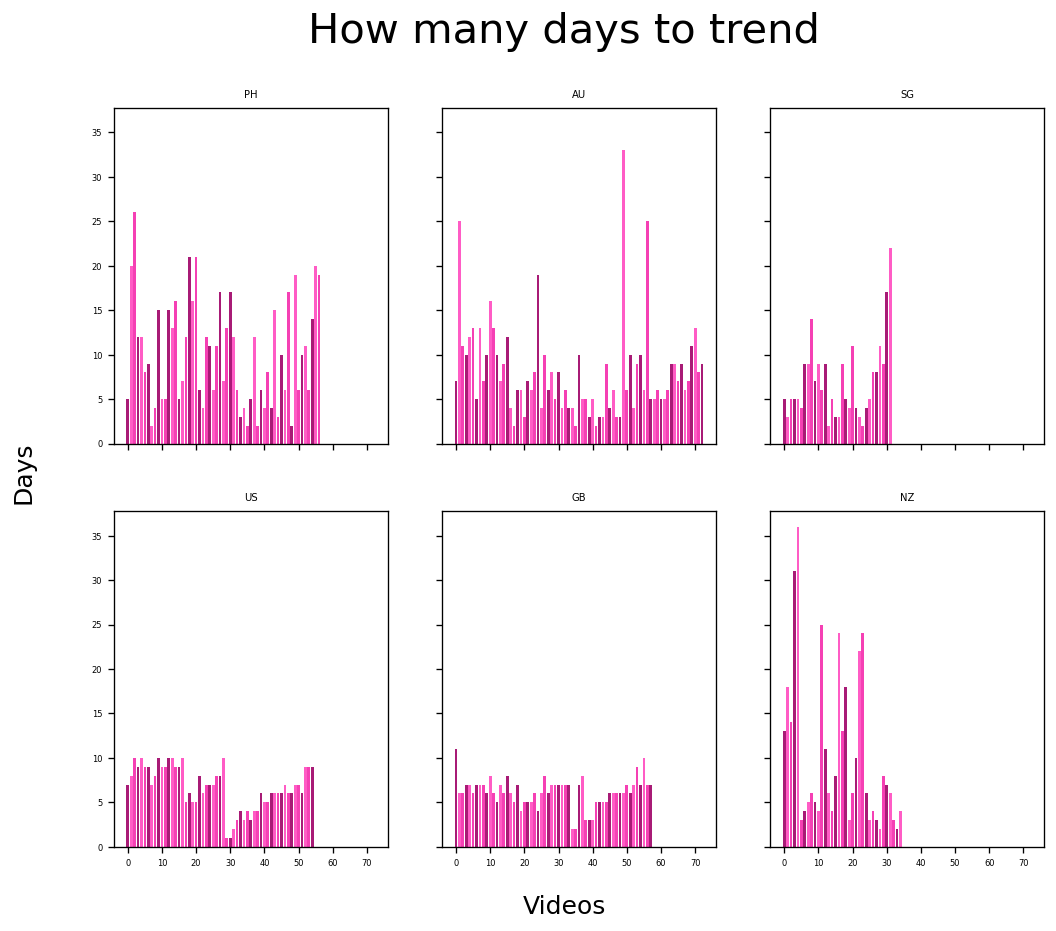

In [16]:
#Plotting a graph on how many days it takes from publishing to trending per country
plt.rcdefaults()
trend_fig, trend_ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=fig_size, dpi = 120)

trend_fig.suptitle("How many days to trend", fontsize=25)
trend_fig.text(0.5, 0.04, 'Videos', ha='center', fontsize=15)
trend_fig.text(0.04, 0.5, 'Days', va='center', rotation='vertical', fontsize=15)

#fig.text(0.5, 0.04, 'common X', ha='center')
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

trend_ax[0, 0].bar(PH_index, PH_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[0, 0].tick_params(labelsize=5)
trend_ax[0, 0].set_title("PH", fontsize=6)

trend_ax[0, 1].bar(AU_index, AU_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[0, 1].tick_params(labelsize=5)
trend_ax[0, 1].set_title("AU", fontsize=6)

trend_ax[0, 2].bar(SG_index, SG_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[0, 2].tick_params(labelsize=5)
trend_ax[0, 2].set_title("SG", fontsize=6)

trend_ax[1, 0].bar(US_index, US_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[1, 0].tick_params(labelsize=5)
trend_ax[1, 0].set_title("US", fontsize=6)

trend_ax[1, 1].bar(GB_index, GB_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[1, 1].tick_params(labelsize=5)
trend_ax[1, 1].set_title("GB", fontsize=6)

trend_ax[1, 2].bar(NZ_index, NZ_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[1, 2].tick_params(labelsize=5)
trend_ax[1, 2].set_title("NZ", fontsize=6)

plt.show()

## Analysis
From a quick visual observation, it looks like a video can be trending in just 1.5 days
But on average, a video takes around 3 days to trend. 

# Interactive Data Visualizations

I tried to explore some interactive data visualizations. But tried to simplify them and focus them on the requirements we needed.

In [17]:
#Importing bokeh for the interactive tool
from bokeh.plotting import figure, output_file, show
import pandas as pd

output_file('Youtube_dataviz.html')

pd.set_option('display.max_columns', None)

## 4. Exploring if there are any relationships between a video's like and the number of comments around it
The following interactive data visualizations need to be run independently per country. Use each cel one at a time because they open up another browser tab and will use the same Youtube_dataviz.html file.

In [18]:
#AU dataset
intviz_01 = figure(
    title='Australian dataset: Relationship between likes vs comments',
    x_axis_label='Likes',
    y_axis_label='Comments')

intviz_01.circle(x=AU_Analysis_df['likes'], y=AU_Analysis_df['comment_count'], size=3)
show(intviz_01)

In [ ]:
#PH dataset
intviz_01 = figure(
    title='Philippine dataset: Relationship between likes vs comments',
    x_axis_label='Likes',
    y_axis_label='Comments')

intviz_01.circle(x=PH_Analysis_df['likes'], y=PH_Analysis_df['comment_count'], size=3)
show(intviz_01)

In [ ]:
#SG dataset
intviz_01 = figure(
    title='Singapore dataset: Relationship between likes vs comments',
    x_axis_label='Likes',
    y_axis_label='Comments')

intviz_01.circle(x=SG_Analysis_df['likes'], y=SG_Analysis_df['comment_count'], size=3)
show(intviz_01)

In [ ]:
#NZ dataset
intviz_01 = figure(
    title='New Zealand dataset: Relationship between likes vs comments',
    x_axis_label='Likes',
    y_axis_label='Comments')

intviz_01.circle(x=NZ_Analysis_df['likes'], y=NZ_Analysis_df['comment_count'], size=3)
show(intviz_01)

In [ ]:
#US dataset
intviz_01 = figure(
    title='U.S. dataset: Relationship between likes vs comments',
    x_axis_label='Likes',
    y_axis_label='Comments')

intviz_01.circle(x=US_Analysis_df['likes'], y=US_Analysis_df['comment_count'], size=3)
show(intviz_01)

In [ ]:
#GB dataset
intviz_01 = figure(
    title='U.K. dataset: Relationship between likes vs comments',
    x_axis_label='Likes',
    y_axis_label='Comments')

intviz_01.circle(x=GB_Analysis_df['likes'], y=GB_Analysis_df['comment_count'], size=3)
show(intviz_01)

## Analysis 
Quick review sees that there is a definite relationship between number of likes and comments. No surprise there. But The steady increase of each is interesting to note, with the proportions varying. 

## 5. Content Review
Finally, the most important task of all, that Tracy (my friend) requested, is to be able to do a quick check of the video stats, and click on the link to do a review of the content. I used a way to display the dataframe with a clickable URL. 
Depending on the notebook setting, you may need to enable scrolling to review the below.
I've kept the datasets separated so they can be reviewed better. 

### Australia Dataset

In [19]:
#Make the videoId clickable so we can navigate the datasets and review any video we want
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="https://www.youtube.com/watch?v={}">{}</a>'.format(val, val)

AU_Analysis_df.style.format({'video_id': make_clickable})

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,162,S6aXAwYT6nY,MY LAST PREGNANCY UPDATE ON THE TWINS | OUR ULTRASOUND RESULTS,2021-01-04 00:00:00,UC_0mlge_fLewbr5P8YEL2tA,THE WEISS LIFE,26,2021-01-11 00:00:00,pregnancy update on the twins!|unexpected news|pregnancy update|twins|pregnant with twins|first ultrasound|twins ultrasound surprise|pregnant|emotional|miscarriage|i lost the baby|ultrasound|pregnancy|babies|vlog|the weiss life|twin pregnancy|pregnancy reveal|are we having twins|weiss life|first ultrasound twins|first ultrasound pregnancy|twin ultrasound|twin|twin pregnancy update|gender reveal|baby|new baby|surprise|Surprise twins,199889,9208,309,0,https://i.ytimg.com/vi/S6aXAwYT6nY/default.jpg,True,False,"Don't forget to subscribe! http://www.youtube.com/theweisslifeIn today's vlog - MY LAST PREGNANCY UPDATE ON THE TWINS | OUR ULTRASOUND RESULTSMelissa's last pregnancy update on the twins. We went to the doctor for an emergency ultrasound a few weeks ago and we got some bad news about the babies. We lost one of the twins and found out that the other baby is at risk for having some complications due to a cyst on it's placenta. If you missed our last pregnancy updates you can catch up here: PREGNANCY UPDATE ON THE TWINS | Our Ultrasound + Unexpected Gender Reveal News: https://www.youtube.com/watch?v=C7tYsqModLc&t=148sOur First Ultrasound | IT'S TWINS! https://youtu.be/5EZnz89BLtk↓My Other Channel↓Melissa Weiss: https://www.youtube.com/channel/UCaGkVbFGD9JfRfppLbKR9mAOUR WEBSITE! https://www.weisslife.com*Follow us on Social*Instagram Accounts:Melissa: http://www.instagram.com/theweissfamGabrielle: http://www.instagram.com/missgabriellenicholeJeff: http://www.instagram.com/jeffweisslifeFacebook: http://www.facebook.com/theweisslifeTwitter: http://twitter.com/TheWeissLifeSend Us Mail!The Weiss Life69 Lincoln Blvd. Suite-A # 267Lincoln, CA 95648Production Music courtesy of www.epidemicsound.com"
1,171,4_Vp3FhrzTk,EATING MASSIVE SEA URCHIN,2020-12-17 00:00:00,UCMyOj6fhvKFMjxUCp3b_3gA,Nick DiGiovanni,22,2021-01-11 00:00:00,[none],3422355,80402,5955,3326,https://i.ytimg.com/vi/4_Vp3FhrzTk/default.jpg,False,False,"Uni is certainly not for everybody. It's a blast of unique briny, slightly salty creaminess, something most people who haven't tried it would love but are too turned off by the look or texture to try. Watch me open these massive Santa Barbara sea urchin. #shorts #uni #seaurchin #california #masterchef"
2,172,2Al7H9AiN1A,Positive 2021 Goals! 12 Unique Ab Exercises & Simple Protein Balls you NEED to try! [VLOG],2020-12-31 00:00:00,UCAHufvd02viJSRdt3ojdPOg,Sarahs Day,22,2021-01-11 00:00:00,new years resolution|goals|setting goals|new years|2021|fat loss|weight loss|best ab exercises|ab workout|lower ab|shredded|easy protein balls|vegan protein balls|simple healthy snacks|easy healthy snack|healthy treat|sweet healthy|how to get healthy|top tips|body comeback|post partum|after birth|pregnancy|body image|confidence|happy|positive|anxiety,455438,26518,190,1028,https://i.ytimg.com/vi/2Al7H9AiN1A/default.jpg,False,False,SWEAT IT TO SHRED IT EBOOK FITNESS GUIDES!!https://www.sarahsday.com/♡INSTAGRAM:@sarahs_day https://www.instagram.com/sarahs_day/♡My PodcastThe Health Code Podcast: https://itunes.apple.com/au/podcast/the-health-code/id1367139815?mt=2………………………………………………………MY PRODUCTS:FIT PROTEIN (cookie dough flavour)Plant Based Protein Powderhttps://tropeaka.com.au/products/fit-protein-cookie-doughBODY BLOOMInner Health + Beauty Powder:https://tropeaka.com/products/body-bloomMY BEAUTY PRODUCTS COLLECTIONhttps://www.labangbody.com.au/collections/sarahs-dayMY ACTIVEWEAR COLLECTION♡Sarah’s Day x White Fox Activewear:https://www.whitefoxboutique.com/sarahs-day-x-wfa………………………………………………….DISCOUNTS:♡Tropeaka 15% off 1st Purchase Code: SEZZY15https://tropeaka.comWorldwide Shipping!♡iHerb c

### Philippine Dataset

In [ ]:
#Make the videoId clickable so we can navigate the datasets and review any video we want
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="https://www.youtube.com/watch?v={}">{}</a>'.format(val, val)

PH_Analysis_df.style.format({'video_id': make_clickable})

### Singapore Dataset

In [ ]:
#Make the videoId clickable so we can navigate the datasets and review any video we want
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="https://www.youtube.com/watch?v={}">{}</a>'.format(val, val)

SG_Analysis_df.style.format({'video_id': make_clickable})

### New Zealand Dataset

In [ ]:
#Make the videoId clickable so we can navigate the datasets and review any video we want
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="https://www.youtube.com/watch?v={}">{}</a>'.format(val, val)

NZ_Analysis_df.style.format({'video_id': make_clickable})

### United States Dataset

In [ ]:
#Make the videoId clickable so we can navigate the datasets and review any video we want
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="https://www.youtube.com/watch?v={}">{}</a>'.format(val, val)

US_Analysis_df.style.format({'video_id': make_clickable})

### UK Dataset

In [ ]:
#Make the videoId clickable so we can navigate the datasets and review any video we want
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="https://www.youtube.com/watch?v={}">{}</a>'.format(val, val)

GB_Analysis_df.style.format({'video_id': make_clickable})

## Analysis
No real analysis here, it's just great to see which videos are trending and the different types of content. The only thing I noticed was that the more drame, the better. The sillier and pointless it is, higher views. Nothing much has changed over the years. Just moved from cable TV to this. 

# Final Conclusion
### I really think that this notebook and the process here are a good start to reviewing and analyzing the top trending Youtube videos. <br> It provides a bit more control and transparency over what can be purchased via agencies and having to use Youtube's daily trending video and needing to write those down. <br> For this project, the datasets(csv) gathered were small enough that Excel or Google Sheets would have been able to review them. Although, in terms of control and visualization, it would have been more work. <br> But in the long run, especially when the data starts to go into months and year(not years because by then, trends would have probably changed already), this would be a lot more advantageous than having to run everything through Excel or Sheets. 

# Future Work
### I plan on using this and reviewing it by end of the month with Tracy. And then see if it's something she can use for her channel on a regular basis. <br> From there I will probably tweak a few things, mainly:<br>
- Automation, a lot of the tasks in the notebook and the scraper should be automated more. I think the scraper can be run with a cron job on a server to save time of me having to run it daily. 
- Longer timeframes, as mentioned before, I think a time period of 3, 6, and a 12 month period should be done. Hopefully, we can see where trends are going and help Tracy adjust to the coming trends of the following year
- Better visualizations, I really want to explore more data viz, but more interactive ones. To help create a simple dashboard, but have the freedom to do the code when required. Especially in finding the correlations and filtering categories and videos. 
- Adding in features like reading through Titles, comments. This can help to create an idea of context and what the videos are about. Also potentially sentiments on the comments. Then I can flesh out likes>dislikes>comment sentiments and what exactly are they saying
- Music, something that maybe A.I. can do, or in the short term, just parsing through descriptions and finding any licensing tags. This can help out in identifying what types of music people like. 
- Finally, maybe explore computer vision and A.I. to review the videos. One thing I am really interested in are the production quality and how the videos are created. Are there more talking heads? Are they cinematic? Do they have a lot of changes to scenes?

# END OF DOCUMENT